<a href="https://colab.research.google.com/github/Otsemeuno/accident_data_brim/blob/main/921796_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Table of Content**

* Business Objective

* Importing Necessary Libraries

* Data Preparation

* First Analysis

* Second Analysis

* Conclusion

# **Business Objective**

The United Kingdom has the second safest roads in Europe according to European Automobile Manufacturers Association (ACEA) yet every 22 minutes someone is killed or seriously injured on UK roads(William Joseph). Every road accident is preventable but to begin to understand how to prevent road accidents there is a need to know why they happen. We are building two models, one that will indicate the main determinants of road accidents in a day in the UK and the other will highlight the factors contributing to the severity of those accidents. The department of transport will use this insight to formulate policies to curb or reduce the occurrence of road accidents. The first model will use the number of accidents in a day as the dependent variable while the second model will use casualty severity as its' dependent variable, both models will make use of information about specific accidents as the independent variables.

Two analysis will be carried out in this report to better understand the accident occurence in the UK. The first analysis is the find out factors that influence the number of accident.
The second analysis is to find the factors  that influence the severity of the accident.

## **Importing Necessary Libraries**

In [ ]:
#Importing necesssary libraries
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC

import time

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

from google.colab import drive

#suppress all warnings
import warnings
warnings.filterwarnings("ignore")

## **Data Preparation**

### **Loading the Data**
The 4 files gotten from the group assignment were imported. They contain all the necessary data needed for this analysis.

In [ ]:
# Mount Google Drive on Kernel
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the data
#for first analysis
trainset = pd.read_csv('/content/drive/MyDrive/trainset.csv', 
                       index_col = 0)
testset = pd.read_csv('/content/drive/MyDrive/testset.csv', 
                      index_col = 0)

#for second analysis
trainsetsev = pd.read_csv('/content/drive/MyDrive/trainsetsev.csv', 
                          index_col = 0)
testsetsev = pd.read_csv('/content/drive/MyDrive/testsetsev.csv', 
                         index_col = 0)

In [ ]:
#viewing the first 5 rows of the trainset
trainset.head()

,date,day_of_week,no_of_accidents,dual_carriageway,one_way_street,roundabout,single_carriageway,slip_road,central_refuge,footbridge,...,frost,wet,1,2,3,4,female,male,no_high_wind,urban_area
0,2020-01-01,2,327,0.186544,0.027523,0.061162,0.694190,0.030581,0.045872,0.000000,...,0.000000,0.308869,0.235474,0.244648,0.183486,0.336391,0.204893,0.642202,0.993884,0.746177
1,2020-01-02,3,523,0.158700,0.013384,0.049713,0.766730,0.011472,0.021033,0.000000,...,0.000000,0.219885,0.256214,0.355641,0.239006,0.149140,0.256214,0.630975,0.936902,0.697897
2,2020-01-03,4,423,0.170213,0.030733,0.066194,0.718676,0.014184,0.011820,0.004728,...,0.002364,0.238771,0.281324,0.378251,0.193853,0.146572,0.234043,0.638298,0.933806,0.666667
3,2020-01-04,5,143,0.167832,0.027972,0.076923,0.727273,0.000000,0.020979,0.000000,...,0.000000,0.055944,0.314685,0.342657,0.293706,0.048951,0.188811,0.685315,1.000000,0.783217
4,2020-01-05,6,273,0.139194,0.003663,0.102564,0.747253,0.007326,0.021978,0.000000,...,0.003663,0.234432,0.347985,0.402930,0.183150,0.065934,0.238095,0.677656,0.992674,0.747253


In [ ]:
# time of the day column was replaced with their value labels 
#trainset and testset for better viewing
trainset = trainset.rename(columns = {'1': 'morning', '2': 'afternoon', 
                                      '3': 'evening', '4': 'night'})
testset = testset.rename(columns = {'1': 'morning', '2': 'afternoon', 
                                    '3': 'evening', '4': 'night'})

In [ ]:
#viewing the first 5 rows of the trainset
trainset.head()

,date,day_of_week,no_of_accidents,dual_carriageway,one_way_street,roundabout,single_carriageway,slip_road,central_refuge,footbridge,...,frost,wet,morning,afternoon,evening,night,female,male,no_high_wind,urban_area
0,2020-01-01,2,327,0.186544,0.027523,0.061162,0.694190,0.030581,0.045872,0.000000,...,0.000000,0.308869,0.235474,0.244648,0.183486,0.336391,0.204893,0.642202,0.993884,0.746177
1,2020-01-02,3,523,0.158700,0.013384,0.049713,0.766730,0.011472,0.021033,0.000000,...,0.000000,0.219885,0.256214,0.355641,0.239006,0.149140,0.256214,0.630975,0.936902,0.697897
2,2020-01-03,4,423,0.170213,0.030733,0.066194,0.718676,0.014184,0.011820,0.004728,...,0.002364,0.238771,0.281324,0.378251,0.193853,0.146572,0.234043,0.638298,0.933806,0.666667
3,2020-01-04,5,143,0.167832,0.027972,0.076923,0.727273,0.000000,0.020979,0.000000,...,0.000000,0.055944,0.314685,0.342657,0.293706,0.048951,0.188811,0.685315,1.000000,0.783217
4,2020-01-05,6,273,0.139194,0.003663,0.102564,0.747253,0.007326,0.021978,0.000000,...,0.003663,0.234432,0.347985,0.402930,0.183150,0.065934,0.238095,0.677656,0.992674,0.747253


In [ ]:
#viewing the shape of the data
trainset.shape

(289, 31)

In [ ]:
#viewing the first 5 rows of the trainsetsev
trainsetsev.head()

,casualty_severity,casualty_class,day_of_week,time,road_type,pedestrian_crossing_physical_facilities,weather_conditions,road_surface_conditions,urban_or_rural_area,age_of_driver,sex_of_driver,age_of_vehicle,high_wind,time_category
116740,3,1,7,17:29:00,roundabout,no_crossing_facilities,fine,dry,urban,31.0,male,10.0,no_high_wind,2
168857,3,1,7,11:13:00,dual_carriageway,non_junction_crossing,fine,dry,rural,58.0,female,11.0,no_high_wind,1
115780,3,1,3,19:01:00,single_carriageway,no_crossing_facilities,fine,dry,urban,30.0,other,10.0,no_high_wind,3
75869,3,2,5,15:26:00,dual_carriageway,no_crossing_facilities,fine,wet,rural,41.0,male,2.0,high_wind,2
66321,2,1,4,14:43:00,single_carriageway,no_crossing_facilities,fine,dry,rural,27.0,male,6.0,no_high_wind,2


In [ ]:
#viewing the shape of the data
trainsetsev.shape

(140848, 14)

### **Splitting the data set into predictor variable, x and target variable, y**

In [ ]:
#for the first analysis
x_train = trainset.drop(['no_of_accidents','date'], axis = 1)
y_train = trainset['no_of_accidents'].copy()

x_test = testset.drop(['no_of_accidents','date'], axis = 1)
y_test = testset['no_of_accidents'].copy()

#for the second analysis
x_trainsev = trainsetsev.drop(['casualty_severity','time'], axis = 1)
y_trainsev = trainsetsev['casualty_severity'].copy()

x_testsev = testsetsev.drop(['casualty_severity','time'], axis = 1)
y_testsev = testsetsev['casualty_severity'].copy()

## **First Analysis**


In this analysis we will be trying to understand the effects of different variables on the number of accidents a day. 

### **Baseline model**


We will use the mean values as the baseline model.

In [ ]:
#building the naive model, the least sophisticated model
#base value to compare the performance of less sophisticated values
#the mean number of accidents that occured is used as the naive model
mean_no_of_accident = y_train.mean()
mean_no_of_accident

444.6297577854671

In [ ]:
#the RSME value of the baseline model is calculated
#this is done to know the performance of the model

# each row of yhat will contain the mean of the distribution
yhat = np.full((y_train.shape[0], 1), mean_no_of_accident) 
#mean square error is calculated for all rows
baseline_mse = mean_squared_error(y_train, yhat) 
# take square root
baseline_rmse = np.sqrt(baseline_mse) 
baseline_rmse

145.9394739223431

RMSE, root mean square error is a measure of how spread out these residuals are.In order words it tells us how concentrated the data is around the line of best fit.
The RMSE of the naive model is calculated to be 145.94. This is will be used as our reference value of rmse.
We will want other models produced in this report to have a smaller RMSE value than 145.94.

### **Model Training**

### **Linear Regression**

We will be using the linear regression model first in this analysis.

In [ ]:
#instatiating a linear regression object
lin_reg = LinearRegression()
#fitting on the x_train and y_train
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#getting the r-squared value
lin_reg.score(x_train, y_train)

0.5513689529573427

The value generated above is the $R^2$ value. The $R^2$ value is the percentage of the independent variable that is accounted for in the dependent variable. This means that 55% of the number of accidents in a day is explained by the independent variable. The RMSE value for the model is shown below.

In [ ]:
# each row of yhat will contain the predicted value of the no of accidents
yhat = lin_reg.predict(x_train)
#mean square error is calculated for all rows
lin_mse = mean_squared_error(y_train, yhat)

#take square root
lin_rmse = np.sqrt(lin_mse)
# take square root
lin_rmse

97.75015145779545

The RMSE value of 97.75, which is less that the value of the naive model, 145.94. This shows that the regression model is better than the baseline model.

In [ ]:
lin_reg = LinearRegression()
rmse_scores = -cross_val_score(lin_reg, x_train, 
                               y_train, 
                               scoring="neg_root_mean_squared_error", 
                               cv=15)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(rmse_scores)

Scores: [108.60609269  97.27414277 111.35245621 116.93281859 192.04105241
 133.64583746  92.44225713  79.13960932 100.36271131 119.24864439
 101.01891139  85.36389024  95.73293585 145.896317    78.90499288]
Mean: 110.53084464201895
Standard deviation: 28.38433995707148


The cross validation is used to inspect the fitting of the model. Regression analysis produced models that have the RMSE of 110.53 with the standard deviation being 28.38. Since the RMSE value created by our regression model on trainset is within the standard deviation of the cross validation, we can conclude the model does not over fit on the training set.

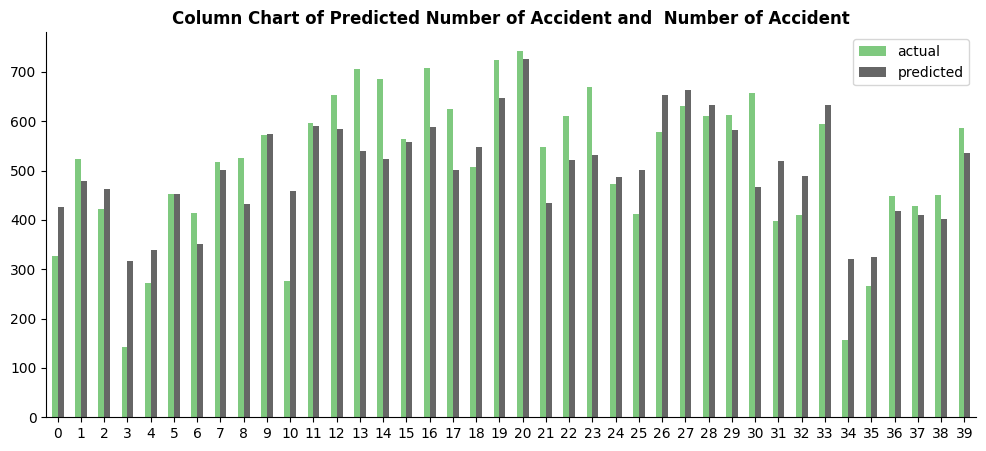

In [ ]:
# create a temporary dataframe containing two columns for the first 40 
df_tmp = pd.DataFrame({"actual": y_train[:40], "predicted": yhat[:40]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", cmap = 'Accent', rot=0)
plt.title('Column Chart of Predicted Number of Accident and  Number of Accident',
          fontweight = 'bold')
sns.despine(top = True, right = True)


From the graph above, we can see that the predicted values are close to the actual values. The model performs alright.

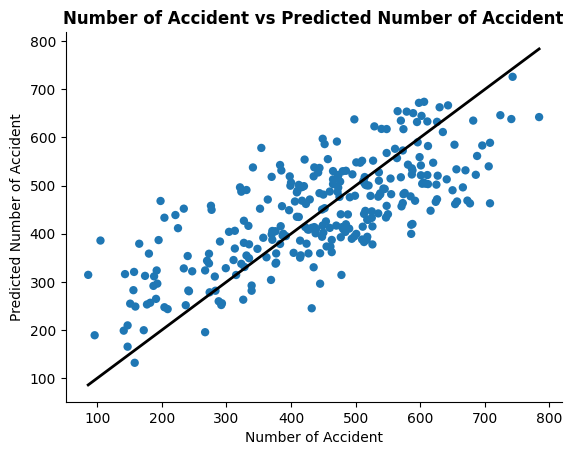

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_train, yhat, edgecolors='None')
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
        'black', lw=2)
ax.set_xlabel('Number of Accident')
ax.set_ylabel('Predicted Number of Accident')
plt.title('Number of Accident vs Predicted Number of Accident', 
          fontweight = 'bold')
sns.despine(top = True, right = True)
plt.show()


The plot above shows that the  predicted value moves in the direction of the actual values. This can be  seen to be a good model.

### **Decision Trees**

We will be using a decision tree to create a model for evaluation.

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=4)
tree_reg.fit(x_train, y_train)
yhat = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, yhat)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

We got a RMSE value of 0, this shows that the model is overfitting on the trainset. This can be seen in the plot below.

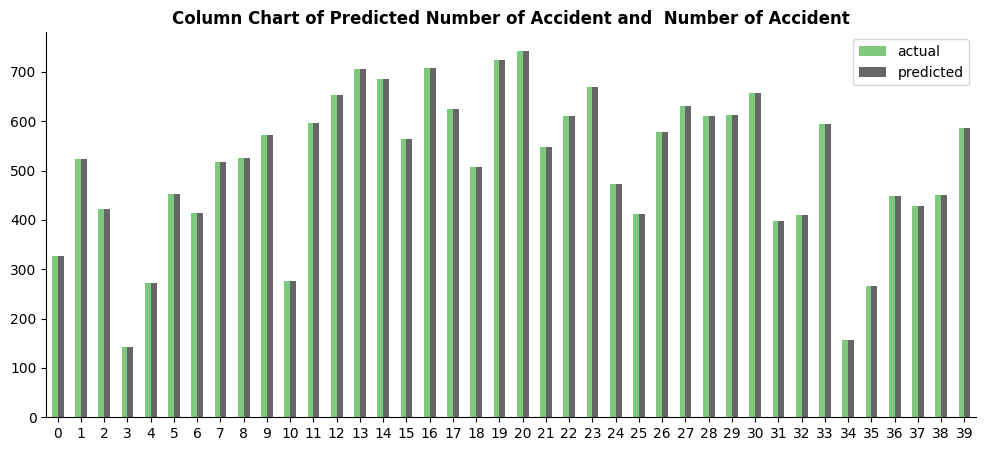

In [ ]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"actual": y_train[:40], "predicted": yhat[:40]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", cmap = 'Accent', rot=0)
plt.title('Column Chart of Predicted Number of Accident and  Number of Accident',
          fontweight = 'bold')
sns.despine(top = True, right = True)

The model predicted the number of accident to be the same as the actual numbers. This proves to a problem and we need too confirm if this is the situation.

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=4)
rmse_scores = -cross_val_score(tree_reg, x_train, y_train, 
                               scoring="neg_root_mean_squared_error", 
                               cv=15)

display_scores(rmse_scores)

Scores: [133.46628788 104.07761527 127.68457229 136.37576764 136.38046627
 166.00063411 108.79023757 145.34568594 147.21824115 169.63862519
 193.67036564 117.3198507  169.73043644 176.80080971 108.02655619]
Mean: 142.70174346528296
Standard deviation: 26.665993680830947


Decision tree model produced models that have the RMSE of 142.7 with the standard deviation being 26.66. Since the RMSE value created by our decison tree model, 0 on trainset is way of the standard deviation of the cross validation, we can conclude the model does :over fit on the training set.

We need to tune the hyper parameters of the decision trees using GridSearch. This helps to find the optimal hyperparameters combinations for the decision trees.

### **Hyperparameter Tuning**

In [ ]:
#We will search for the best combination of the min_samples_leaf,
#min_sampoles_split and the max_depth
param_grid = {
    'min_samples_leaf': [ 100,  50, 10, 5],
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 60, 70, 80],
    'max_depth': [2, 4, 6, 8,10, 12, None]
}
#where max_depth is the maximum number of levels in a tree
#min_samples_split is the minimum number of samples requires to split a node
#min_samples_leaf is the minimum number of samples that can be a node
dec_tree_reg = DecisionTreeRegressor(random_state=4)

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(dec_tree_reg, param_grid, cv=10,
                           scoring='neg_root_mean_squared_error', 
                           return_train_score=True, verbose=2)
#fitting the training data to the model
grid_search.fit(x_train, y_train)

In [ ]:
#getting our best model
best_est = grid_search.best_estimator_
best_est

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=50,
                      random_state=4)

In [ ]:
#obtaining the RMSE of our best model
-grid_search.best_score_

110.32839910765522

The value of our RMSE of the best estimator in the grid search is less than the base line model but greater than the regression model. It also performs better than the linear regression model but slightly better. We will then run our model, using the hyper parameters of our best model.

In [ ]:
#re-training of the model based on the best estimator hyper parameters
yhat = best_est.predict(x_train)

tree_mse = mean_squared_error(y_train, yhat)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

89.66857116373677

The RMSE values of this model is less than both the baseline model and the linear regression model. It is also less than the mean value of the estimator but not by much, this shows that the model seems to have over fit a little on the training set and will perform worse on a new data set.

In [ ]:
#getting the r-squared value
best_est.score(x_train, y_train)

0.6224843621002356

 This means that 62.25% of the number of accidents in a day is explained by the independent variable in our model. 

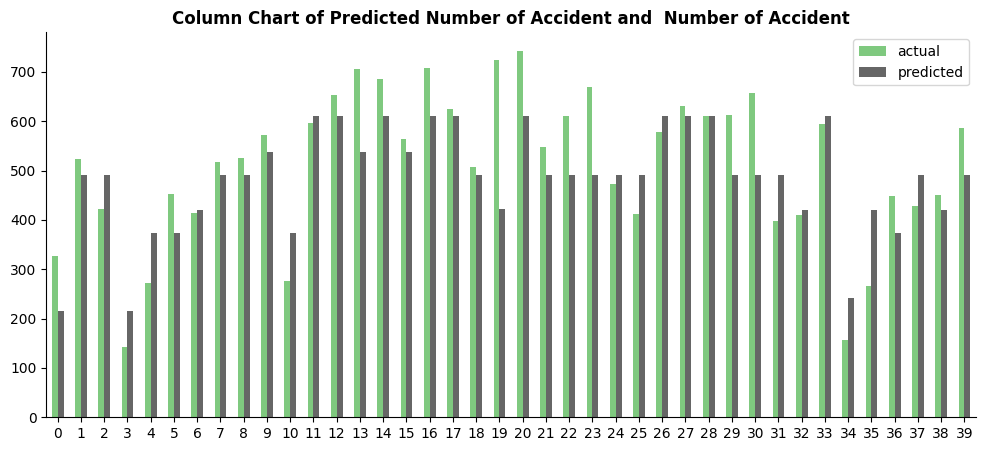

In [ ]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"actual": y_train[:40], "predicted": yhat[:40]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", cmap = 'Accent', rot=0)
plt.title('Column Chart of Predicted Number of Accident and  Number of Accident',
          fontweight = 'bold')
sns.despine(top = True, right = True)

From the column chart above, we can see that the predicted values are close to the actual values although it is conservative in most predictions. The model performs alright.

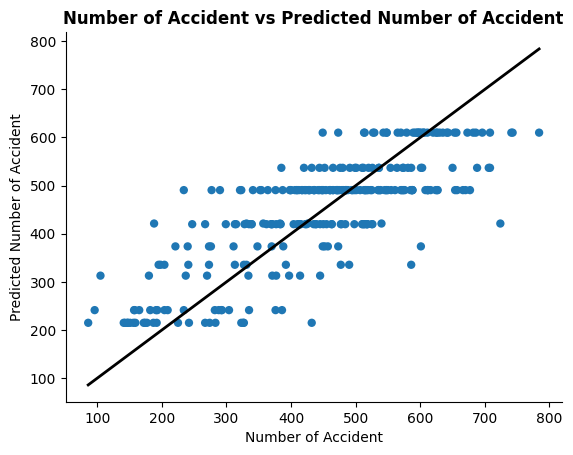

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_train, yhat, edgecolors='None')
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
        'black', lw=2)
ax.set_xlabel('Number of Accident')
ax.set_ylabel('Predicted Number of Accident')
plt.title('Number of Accident vs Predicted Number of Accident', 
          fontweight = 'bold')
sns.despine(top = True, right = True)
plt.show()

Since the predicted vs actual value does not sit on the line, we conclude there is no problem of overfitting here. The points move in the direction of the line, this shows the predicted number of accidents are close to the actual number of accidents

### **Random Forest**

We will be using a decision tree to create a model for evaluation.

In [ ]:
# specify the hyperparameters and their values
param_grid = [
    {'n_estimators': [100, 150, 200, 500],
     'max_depth': [None]},
]

forest_reg = RandomForestRegressor(random_state=7)

# we'll use 10-fold cross-validation
rand_grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=10,
                                      n_iter=6, random_state=7, 
                                      scoring='neg_root_mean_squared_error', 
                                      return_train_score=True, verbose=2)
rand_grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=150; total time=   0.6s
[CV] END ...................max_depth=None, n_es

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=7),
                   n_iter=6,
                   param_distributions=[{'max_depth': [None],
                                         'n_estimators': [100, 150, 200, 500]}],
                   random_state=7, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
bestrand = rand_grid_search.best_estimator_
bestrand

RandomForestRegressor(n_estimators=500, random_state=7)

In [ ]:
-rand_grid_search.best_score_

100.62538201287319

In [ ]:
yhat = bestrand.predict(x_train)

tree_mse = mean_squared_error(y_train, yhat)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

36.52676763149918

The RMSE values of this model is less than both the baseline model and the linear regression model. It is also less than the mean value of the estimator but not by much, this shows that the model seems to have over fit on the training set and will perform worse on a new data set. SO far our best model has been the random forest model

In [ ]:
#getting the r-squared value
bestrand.score(x_train, y_train)

0.9373563678207214

 This means that 94% of the number of accidents in a day is explained by the independent variable. 

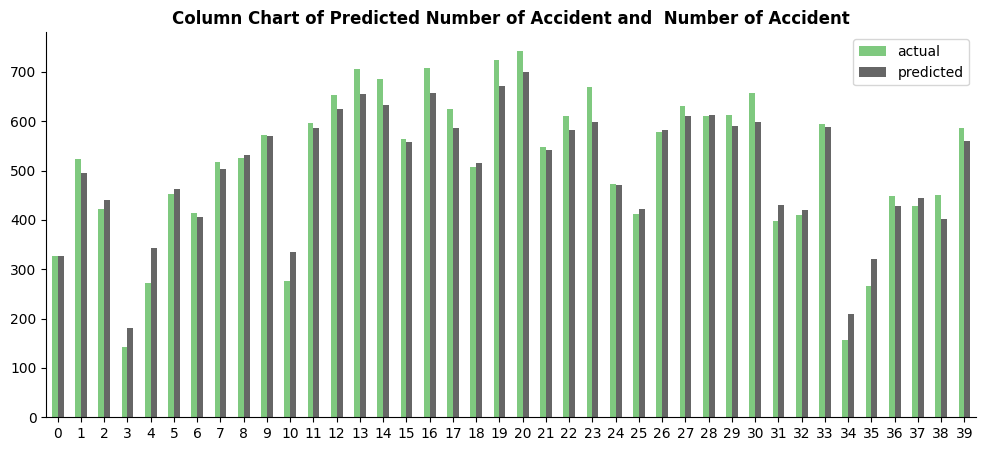

In [ ]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"actual": y_train[:40], "predicted": yhat[:40]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", cmap = 'Accent', rot=0)
plt.title('Column Chart of Predicted Number of Accident and  Number of Accident',
          fontweight = 'bold')
sns.despine(top = True, right = True)

From the column chart above, we can see that the predicted values are close to the actual values although it is conservative in most predictions. The model performs alright.

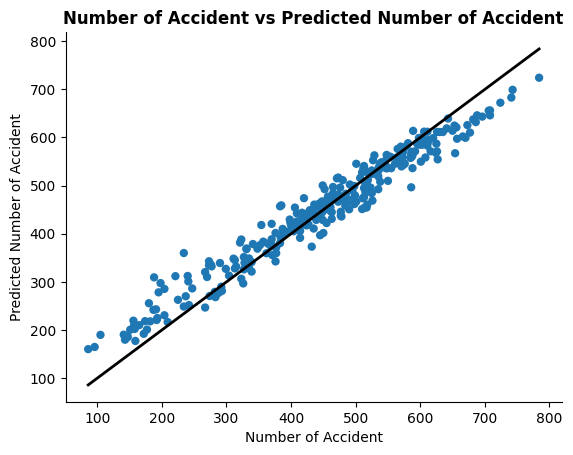

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_train, yhat, edgecolors='None')
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
        'black', lw=2)
ax.set_xlabel('Number of Accident')
ax.set_ylabel('Predicted Number of Accident')
plt.title('Number of Accident vs Predicted Number of Accident', 
          fontweight = 'bold')
sns.despine(top = True, right = True)
plt.show()

The predicted number of accidents in a day is similar to the actual number of accidents that occured in the training set using random forest algorithm. This is most definitely as a result of over-fitting of the model and will perform worse on a different data but the RMSE value will be around 100 as this is seen from the mean performance of the model on different distribution of the training data.

<table font-family =  'arial', sans-serif,
  border-collapse = 'collapse',
  width = '100%' >
  <tr>
    <th>model</th>
    <th>RMSE</th>
    <th>RMSE_CROSS_VAL</th>
    <th>R-Square</th>
  </tr>
  <tr>
    <th>Base Model</th>
    <th>145.94</th>
    <th> </th>
    <th> </th>
  </tr>
  <tr>
    <th>Linear Regression</th>
    <th>97.75</th>
    <th>110.54</th>
    <th>55.3</th>
  </tr>
  <tr>
    <th>Decision Tree</th>
    <th>89.67</th>
    <th>110.32</th>
    <th>62.25</th>
  </tr>
  <tr>
    <th>Random Forest</th>
    <th>36.53</th>
    <th>100.62</th>
    <th>93.73</th>
  </tr>

From the table above, we will be using the random forest algorithm because it performs the best on the training test and has the best on cross validation. The adjusted r-squeared value is high as a result of overfitting but we still expect this to be higher than the others based on the validation score.

### **Feature Importance**

We are about to examine the variables with the most importance for the regression problem in the best perfoming model. These will be stored as an attribute on the model object.

In [ ]:
# put them into a separate variable for convenience
feature_importances = rand_grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, x_train.columns), reverse=True):
    print(f"{v}: {k:.3f}")

female: 0.312
male: 0.091
dual_carriageway: 0.075
morning: 0.074
urban_area: 0.062
slip_road: 0.042
non_junction_crossing: 0.039
afternoon: 0.026
central_refuge: 0.022
zebra: 0.020
roundabout: 0.019
night: 0.018
no_high_wind: 0.018
evening: 0.018
other: 0.017
no_crossing_facilities: 0.017
single_carriageway: 0.015
frost: 0.015
one_way_street: 0.014
rainy: 0.013
pedestrian_phase: 0.013
fine: 0.011
footbridge: 0.009
wet: 0.009
fog: 0.009
day_of_week: 0.008
dry: 0.008
flood: 0.004
snow: 0.002


We can notice that the number of female relative to men on the road is by far the most useful variable for determining the number of accidents that occur in the day. Other useful features are the number of male relative to females on the road, number of dual_carriageway road that an accident occured, the morning time in relation to other time of the day.

There are some features that are much less useful: the day of the week, dry road, flood and snow. We will remove these columns if we were to predict the number of accidents that occur per day but that is not the case here.

### **Evaluation on test set**

In [ ]:
yhat = bestrand.predict(x_test)

final_mse = mean_squared_error(y_test, yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

114.81360841963665

The performance on the test set turns out to be very similar to the performance on the training set achieved with the cross-validation, it is a bit worse but this is not uncommon as the test set is a new data set.

We will visualise the prediction on the test set below

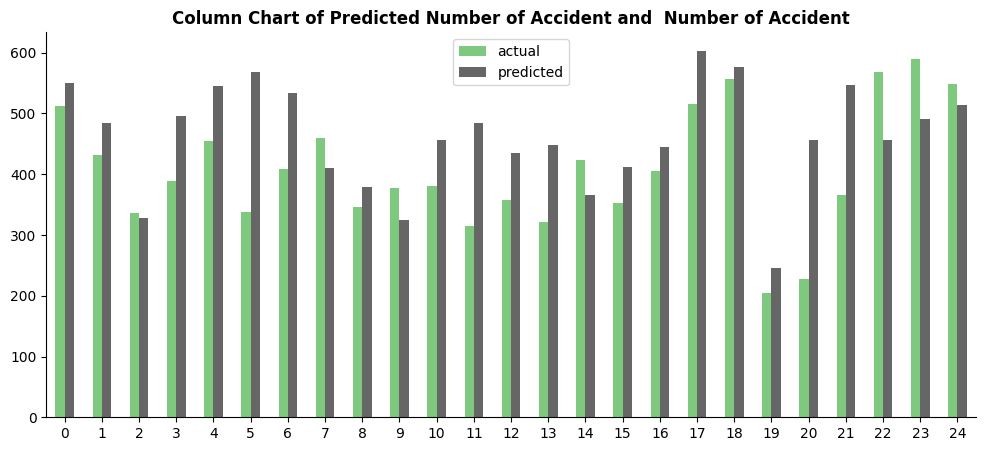

In [ ]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"actual": y_test[:25], "predicted": yhat[:25]})
# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", cmap = 'Accent', rot=0)
plt.title('Column Chart of Predicted Number of Accident and  Number of Accident',
          fontweight = 'bold')
sns.despine(top = True, right = True)

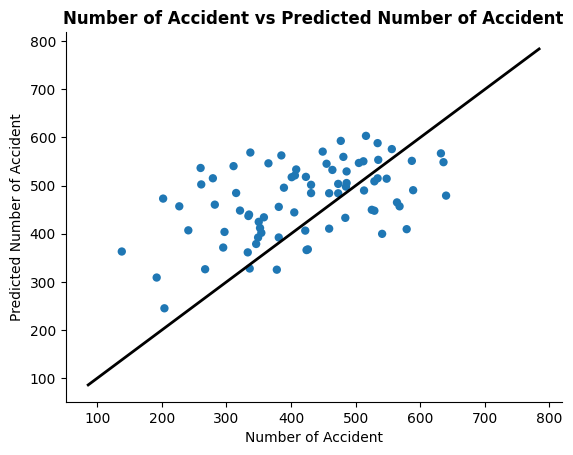

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, yhat, edgecolors='None')
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
        'black', lw=2)
ax.set_xlabel('Number of Accident')
ax.set_ylabel('Predicted Number of Accident')
plt.title('Number of Accident vs Predicted Number of Accident', 
          fontweight = 'bold')
sns.despine(top = True, right = True)
plt.show()

From the charts above, we can see the predicted number of accidents in a day is similar to the actual number of accidents that occured in the test set using random forest algorithm. The model is good and is fit for prediction and evaluation.

## **Second Analysis**


In this analysis we will be trying to understand the effects of different variables on the severity of accident. 

In [ ]:
def get_dummies(trainset, testset, old_col_name):
    """Given a trainset, a testset, and the name of a column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset
    """
    
    one_hot_encoder = OneHotEncoder(drop="first", sparse=False)
    
    # the input to the encoder must be a 2-d numpy array,
    # so we take the column, extract their values and reshape the array to be 2-d
    cat_vals = trainset[old_col_name].values.reshape(-1,1)

    # fit an encoder and transform the **trainset**
    
    # the output is a new numpy array
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    # in the list of new columns, convert numpy array to a list and
    # drop the first column, because we requested "drop='first'"
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    
    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        trainset[new_col_name] = transformed[:,i]
    
    # transform the **testset** using the fitted encoder
    
    cat_vals = testset[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)

    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        testset[new_col_name] = transformed[:,i]
    
    return trainset, testset


for col_name in ['casualty_class', 'day_of_week', 'road_type',
                 'pedestrian_crossing_physical_facilities', 'weather_conditions',
                 'road_surface_conditions', 'urban_or_rural_area', 
                 'sex_of_driver', 'high_wind', 'time_category']:
    x_trainsev, x_testsev = get_dummies( x_trainsev, x_testsev, col_name)

# check if the dummies are produced correctly in the trainset
x_trainsev.head()

,casualty_class,day_of_week,road_type,pedestrian_crossing_physical_facilities,weather_conditions,road_surface_conditions,urban_or_rural_area,age_of_driver,sex_of_driver,age_of_vehicle,...,fog,other,rainy,snow,flood,frost,wet,urban,male,no_high_wind
116740,1,7,roundabout,no_crossing_facilities,fine,dry,urban,31.0,male,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
168857,1,7,dual_carriageway,non_junction_crossing,fine,dry,rural,58.0,female,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
115780,1,3,single_carriageway,no_crossing_facilities,fine,dry,urban,30.0,other,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
75869,2,5,dual_carriageway,no_crossing_facilities,fine,wet,rural,41.0,male,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
66321,1,4,single_carriageway,no_crossing_facilities,fine,dry,rural,27.0,male,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
# time of the day column was replaced with their value labels 
#trainset and testset for better viewing
trainsetsev = trainsetsev.rename(columns = {'1': 'morning', '2': 'afternoon', 
                                      '3': 'evening', '4': 'night'})
testsetsev = testsetsev.rename(columns = {'1': 'morning', '2': 'afternoon', 
                                    '3': 'evening', '4': 'night'})

In [ ]:
cols_to_drop = ['casualty_class', 'day_of_week', 'road_type',
                 'pedestrian_crossing_physical_facilities', 'weather_conditions',
                 'road_surface_conditions', 'urban_or_rural_area', 
                 'sex_of_driver', 'high_wind', 'time_category']
x_trainsev.drop(columns=cols_to_drop, inplace=True)
x_testsev.drop(columns=cols_to_drop, inplace=True)
x_trainsev.head()

,age_of_driver,age_of_vehicle,2,3,4,5,6,7,one_way_street,roundabout,...,fog,other,rainy,snow,flood,frost,wet,urban,male,no_high_wind
116740,31.0,10.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
168857,58.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
115780,30.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
75869,41.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
66321,27.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
corr_sev = trainsetsev.corr()
corr_sev['casualty_severity']

casualty_severity    1.000000
casualty_class      -0.033010
day_of_week          0.001285
age_of_driver       -0.036385
age_of_vehicle      -0.009925
time_category       -0.035604
Name: casualty_severity, dtype: float64

### **Baseline model**


We will use the mean values as the baseline model.

In [ ]:
#building the naive model, the least sophisticated model
#base value to compare the performance of less sophisticated values
#the mean number of accidents that occured is used as the naive model
mode_of_sev = y_trainsev.mode()
base_model = mode_of_sev[0]
base_model

3

In [ ]:
accuracy_score(y_trainsev, yhat)

In [ ]:
# the number of instances belonging to each class
y_trainsev.value_counts()

3    115465
2     23559
1      1824
Name: casualty_severity, dtype: int64

In [ ]:
# total size of the training set
y_trainsev.shape[0]

140848

In [ ]:
#the accuracy value of the baseline model is calculated
#this is done to know the performance of the model

# each row of yhat will contain the mean of the distribution
yhat = np.full((y_trainsev.shape[0], 1), base_model) 
accuracy_score(y_trainsev, yhat)
 

0.8197844484834715

The accuracy of the model is 81.9%. This means that the model is right over 80% of the dataset

In [ ]:
precision_base = precision_score(y_trainsev, yhat, average = 'macro')

recall_base = recall_score(y_trainsev, yhat, average = 'macro')


f_base = f1_score(y_trainsev, yhat, average = 'macro')
f_base

0.3003229124807039

The fscore is 0.30, the low but this value will be used only as a refernce.

Macro averaging was used to calculate the fscore value used in this report.

### **Model Training**

### **Random Forest**

In [ ]:
#instatiating the randomforest object
rf = RandomForestClassifier(random_state=7)

#hyperparameters and their values were specified
param_grid = {
    'n_estimators': [2, 5, 10],
    'max_depth': [50,80,100]
}

# we'll use 7-fold cross-validation
grid_search = RandomizedSearchCV(rf, param_grid, cv=7,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(x_trainsev, y_trainsev)
end = time.time() - start
print(f"Took {end} seconds")

Took 81.01856756210327 seconds


In [ ]:
bestrand = grid_search.best_estimator_

In [ ]:
grid_search.best_score_

0.3740355395355311

The best hyperparameters  are n_estimators=5, max_depth=50. They achieve the F-score of 0.37, the best so far.

The best F-scores achieved by the best model in each fold and it is seen in the table below.

In [ ]:
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1)
best_model_index

1

In [ ]:
rf_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index='best_model_index') from each of the 5 splits
    val = grid_search.cv_results_[f"split{x}_test_score"][best_model_index]
    rf_split_test_scores.append(val)

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
1,"{'n_estimators': 5, 'max_depth': 50}",0.736438,0.374036,49.210173
4,"{'n_estimators': 5, 'max_depth': 80}",0.736438,0.374036,49.210173
7,"{'n_estimators': 5, 'max_depth': 100}",0.736438,0.374036,49.210173
2,"{'n_estimators': 10, 'max_depth': 50}",0.761487,0.373485,50.953267
5,"{'n_estimators': 10, 'max_depth': 80}",0.761487,0.373485,50.953267
8,"{'n_estimators': 10, 'max_depth': 100}",0.761487,0.373485,50.953267
0,"{'n_estimators': 2, 'max_depth': 50}",0.689582,0.369900,46.358833
3,"{'n_estimators': 2, 'max_depth': 80}",0.689582,0.369900,46.358833
6,"{'n_estimators': 2, 'max_depth': 100}",0.689582,0.369900,46.358833


The higher the number of estimators, we notice the largest overfitting. The performance on the trainset is greater than that of the testset, this suggest the model needs lots of improvements by tuning other hyper parameter tuning of  the Random Forest Method 

In [ ]:
yhat = bestrand.predict(x_trainsev)
accuracy_score(y_trainsev, yhat)

0.8924727365670794

The accuracy of the model is 89.24%. This means that the model is right almost 90% of the data set

In [ ]:
precision_base = precision_score(y_trainsev, yhat, average = 'macro')

recall_base = recall_score(y_trainsev, yhat, average = 'macro')


f_base = f1_score(y_trainsev, yhat, average = 'macro')
f_base

0.7250559921318039

The f_score of the random forest algorithm is much more higher than the base model, the predicted values here will be more reliable than the base model.

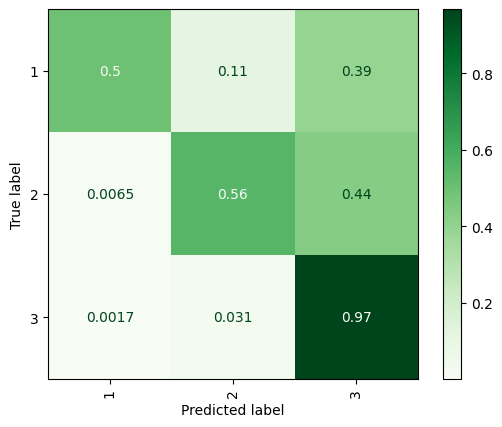

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_trainsev, yhat, 
                                        labels=bestrand.classes_, 
                                        xticks_rotation="vertical", 
                                        normalize="true",
                                        cmap=plt.cm.Greens)

From t he heatmap above, we can see the model predicts best for slight accident(97%) than it does for serious or fatal accident. This will be an issue when trying to predict the serious or fatal accident. 

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, x_trainsev.columns), reverse=True):
    print(f"{v}: {k:.3f}")

age_of_driver: 0.502
age_of_vehicle: 0.289
6: 0.020
2: 0.019
wet: 0.018
7: 0.017
5: 0.017
3: 0.014
rainy: 0.011
single_carriageway: 0.011
urban: 0.010
no_high_wind: 0.010
male: 0.009
no_crossing_facilities: 0.006
roundabout: 0.006
4: 0.006
other: 0.005
non_junction_crossing: 0.005
frost: 0.004
slip_road: 0.003
zebra: 0.003
fog: 0.003
pedestrian_phase: 0.003
one_way_street: 0.003
snow: 0.002
footbridge: 0.001
flood: 0.001


We can notice that the age of driver and age of the vehicle are by far the most useful variable for determining the number of accidents that occur in the day. Other useful features are if it is a friday, if it is a monday, if the ground is wet.

There are some features that are much less useful: the presence of pedestrian phase, if it is a one way street, if it is a footbridge, if it is snowy and if there is flood. We will remove these columns if we were to predict the number of accidents that occur per day but that is not the case here.

### **Support Vector Machines**

We will be using a support vector machine to create a model for evaluation.

In [ ]:
lsvm = LinearSVC(random_state=7, max_iter=2000)

# specify the hyperparameters and their values
# 5 combinations in the grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
}

# we'll use 5-fold cross-validation
grid_search = RandomizedSearchCV(lsvm, param_grid, cv=5, 
                                 scoring='f1_macro', 
                                 return_train_score=True) 

start = time.time()
grid_search.fit(x_trainsev, y_trainsev)
end = time.time() - start
print(f"Took {end} seconds")

Took 3440.5928745269775 seconds


In [ ]:
bestsvm = grid_search.best_estimator_
bestsvm

LinearSVC(C=0.001, max_iter=2000, random_state=7)

In [ ]:
grid_search.best_score_

0.30032291250813226

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
0,{'C': 0.001},0.300323,0.300323,-8.562131e-09
1,{'C': 0.01},0.300323,0.300323,-8.562131e-09
2,{'C': 0.1},0.300323,0.300323,-8.562131e-09
3,{'C': 1},0.300322,0.300323,-1.404312e-04
4,{'C': 10},0.262573,0.262255,1.212107e-01


Further tuning the c hyper-parameter tuning did not improvethe quality of the model. So we have to stop as this takes a long time to execute

In [ ]:
yhat = bestsvm.predict(x_trainsev)
accuracy_score(y_trainsev, yhat)

0.8197844484834715

The accuracy of the model is 81.97%. This means that the model is correct for more than 80% of the data set

In [ ]:
precision_base = precision_score(y_trainsev, yhat, average = 'macro')

recall_base = recall_score(y_trainsev, yhat, average = 'macro')


f_base = f1_score(y_trainsev, yhat, average = 'macro')
f_base

0.3003229124807039

The f_score of the SVM algorithm is much more higher than the base model but worse than the Random Forest algorithm.

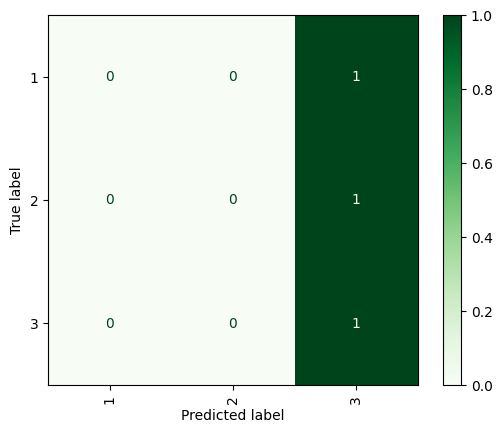

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_trainsev, yhat, 
                                        labels=bestsvm.classes_, 
                                        xticks_rotation="vertical", 
                                        normalize="true",
                                        cmap=plt.cm.Greens)

From the heatmap above, we can see the model predicts poorly. It predicts all of the accidents as slight accident, which is not the case. We therefore will be going ahead with the Random Forest model as this is the best produced.

### **Test the best models**
We will evaluate both models 

****Random Forest****

In [ ]:
yhat1 = bestrand.predict(x_testsev)
accuracy_score(y_testsev, yhat)

0.8197824667026382

The accuracy of the model is 81.92%. This is smaller than the trainset but this is expected. Overall the model did not do bad.

In [ ]:
precision_base = precision_score(y_testsev, yhat1, average = 'macro')

recall_base = recall_score(y_testsev, yhat1, average = 'macro')


f_base = f1_score(y_testsev, yhat1, average = 'macro')
print(f'The precision is {precision_base}')
print(f'The f_score is {recall_base}')
print(f'The f_score is {f_base}')

The precision is 0.39538746901835853
The f_score is 0.3724204758069041
The f_score is 0.3773595592893346


The f_score of the random forest algorithm on the test set is 0.37. This is way less than the f_score of the model on the training set. The model has overfit on the training. We will still go ahead and use it to analyse the data set for the sake of this report but it should not be used as the model is not good. It might improve by removing the insignificant columns in the model and further column transformation.

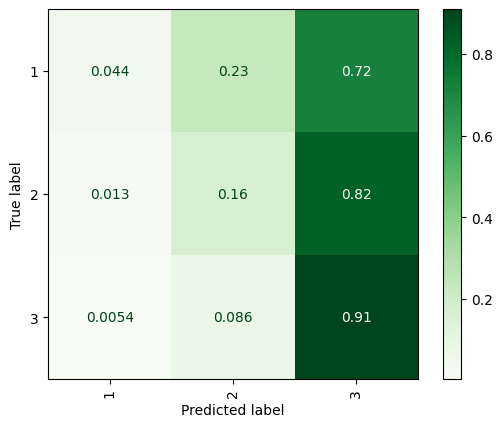

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_testsev, yhat1, 
                                        labels=bestrand.classes_, 
                                        xticks_rotation="vertical", 
                                        normalize="true",
                                        cmap=plt.cm.Greens)

The model predicted poorly on the serious and fatal accident class but predicts the slight accident very well.

## **Conclusion**

From the first analysis, we observed that the presence of more women on the road than either male or other resulted to more accidents occuring that day. Days with high accidents, the accidents are most likely to occur on dual carriage roads in the morning and they will occur in rural areas.
The second analysis proves age of the drive and age of the vehicle to important parameters in the model. From the correlation analysis, we ssee that the higher the age the less severe the accident and vice versa. The age of car behaved similar to the age of the driver although it has a lower correlation. This could be as a result of people with modern vehicles with a faster acceleration and speed.

I will recommend the permitted age of drivers be increased. This will have an effect on the severity of accidents that will occur. I also recommend serious punishment be attached to defaulting speed limits especially in the rural areas. 